In [8]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [9]:
img_array = cv2.imread(r"train\0\Training_63181.jpg")

In [10]:
img_array.shape

(48, 48, 3)

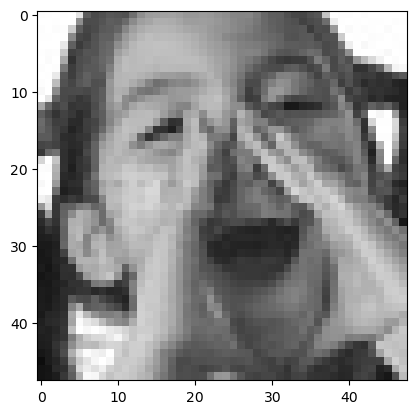

In [11]:
plt.imshow(img_array)

In [12]:
Datadirectory = "train/" # training dataset

In [13]:
classes = ["0","1","2","3","4","5","6"] # list of classes = > angry happy .......etc

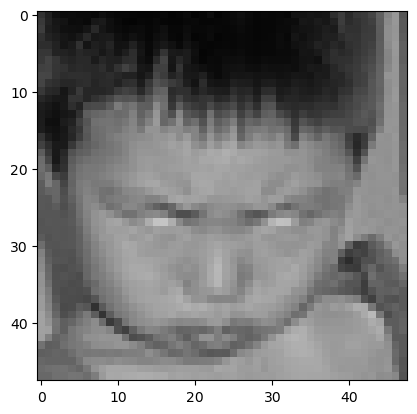

In [14]:
for category in classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

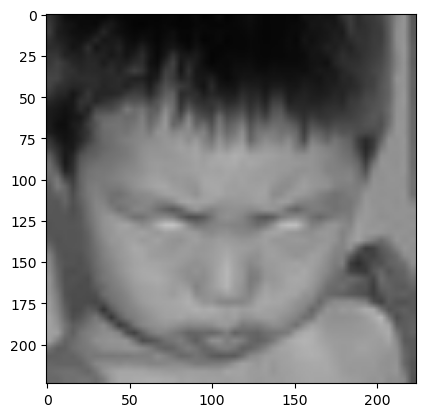

In [15]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
new_array.shape

(224, 224, 3)

In [17]:
#Read all the images and covert them into array

In [18]:
training_data = []
def create_training_data():
    for category in classes:
        path = os.path.join(Datadirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
        

In [19]:
create_training_data()

In [20]:
print(len(training_data))

28709


In [21]:
import random
random.shuffle(training_data)

In [22]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [25]:
X.shape

(28709, 224, 224, 3)

In [26]:
print(type(X))


<class 'numpy.ndarray'>


In [27]:
batch_size = 255

# Calcul du nombre de batches
num_batches = len(training_data) // batch_size

for i in range(num_batches):
    # Sélection des données du batch courant
    start = i * batch_size
    end = start + batch_size
    batch_data = training_data[start:end]

    # Traitement des données du batch courant
    X = [] # pour les data (features)
    y = [] # pour les labels

    for features, label in batch_data:
        X.append(features)
        y.append(label)

    X = np.array(X).reshape(-1, img_size, img_size, 3)
    X.shape
    # Faites quelque chose avec X et y (par exemple, entraînez un modèle)


# il y a pluseurs façons pour normaliser exemple l'utilisation de scikit learn mais on va utiliser
X = X/255.0;

In [28]:
Y = np.array(y)

In [29]:
Y.shape

(255,)

In [30]:
### deep learning model --- TransferLearning

In [31]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers


In [32]:
model = tf.keras.applications.MobileNetV2()

In [33]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [34]:
# Transfer Learning

In [35]:
base_input = model.layers[0].input

In [36]:
base_output = model.layers[-2].output

In [37]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d_1')>

In [38]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)

In [39]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [40]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [41]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [42]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam",metrics = ["accuracy"])


In [43]:
#new_model.fit(X,Y, epochs=25)

In [44]:
new_model.save('mod_my_model_94p69.h5')

In [45]:
new_model = tf.keras.models.load_model('mod_my_model_94p69.h5')

In [46]:
frame = cv2.imread(r"C:\Minor_Project\download (1).jpeg")

In [47]:
frame.shape

(125, 188, 3)

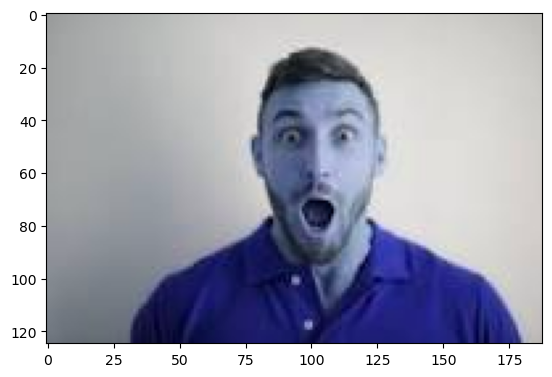

In [48]:
plt.imshow(frame)

In [49]:
faceCascade = cv2.CascadeClassifier("C:\Minor_Project\haarcascade_frontalface_default.xml")

In [50]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [51]:
gray.shape

(125, 188)

In [52]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print('No Face detected')
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex:ex+ew]


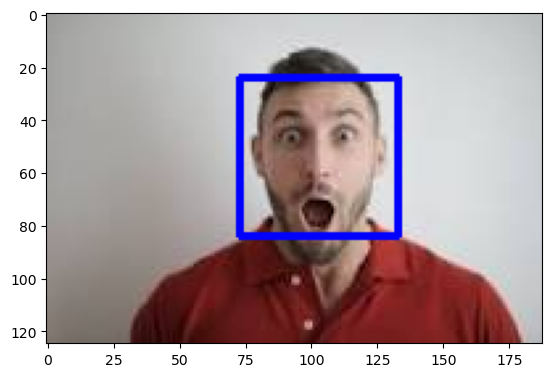

In [53]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

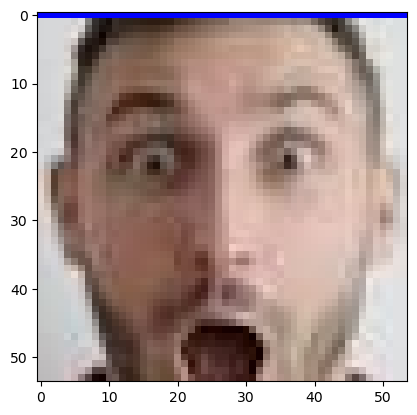

In [54]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [55]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [56]:
Predictions = new_model.predict(final_image)


1/1 [==============================] - 1s 1s/step


In [57]:
Predictions

array([[0.12424734, 0.25105166, 0.08693551, 0.15516564, 0.12291452,
        0.09335312, 0.16633217]], dtype=float32)

In [58]:
maximum = np.argmax(Predictions)
print(maximum)

1


In [59]:
def predictor(maximum):
    if(maximum==0):
        print("Angry")
    elif(maximum==1):
        print("disgust")
    elif(maximum==2):
        print("fear")
    elif(maximum==3):
        print("happy")
    elif(maximum==4):
        print("neutral")
    elif(maximum==5):
        print("sad")
    if(maximum==6):
        print("suprise")
    
### real time demo

In [60]:
predictor(maximum)

disgust


In [61]:
# ## 1st model try

# import cv2
# path = "C:\Minor_Project\haarcascade_frontalface_default.xml"
# font_scale = 1.5
# font = cv2.FONT_HERSHEY_PLAIN

# rectangle_bgr = (255,255,255)
# img = np.zeros((500,500))

# text = "Some text in a box !"

# (text_width, text_height)=cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
# text_offset_x = 10
# text_offset_y = img.shape[0] - 25

# box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
# cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
# cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

# cap = cv2.VideoCapture(1)

# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     raise IOError("cannot open webcam")

# while True:
#     ret,frame = cap.read()
#     faceCascade = cv2.CascadeClassifier("C:\Minor_Project\haarcascade_frontalface_default.xml")
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     faces = faceCascade.detectMultiScale(gray,1.1,4)
#     for x,y,w,h in faces:
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = frame[y:y+h, x:x+w]
#         cv2.rectangle(frame, (x,y),(x+w, y+h), (255,0,0),2)
#         facess = faceCascade.detectMultiScale(roi_gray)
#         if len(facess)==0:
#             print("face not detected")
#         else:
#             for(ex, ey,ew,eh) in facess:
#                 face_roi = roi_color[ey: ey+eh, ex:ex + ew]
#     final_image = cv2.resize(face_roi, (224, 224))
#     final_image = np.expand_dims(final_image, axis=0)
#     final_image = final_image/255.0
    
#     font = cv2.FONT_HERSHEY_SIMPLEX
    
#     Predictions = new_model.predict(final_image)
#     font_scale = 1.5
#     font = cv2.FONT_HERSHEY_PLAIN
    
#     if(np.argmax(Predicitions)==0):
#         status = "Angry"
        
#         x1,y1,w1,h1 = 0,0,175,75
        
#         cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
#         cv2.putText(frame, status, (x1+ int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
#         cv2.putText(frame, status,(100, 150), font, 3,(0,0,255),2,cv2.LINE_4)
#         cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
        
#     elif(np.argmax(Predictions)==1):
#         status = "Disgust"
        
#         x1,y1,w1,h1 = 0,0,175,75
        
#         cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
#         cv2.putText(frame, status, (x1+ int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
#         cv2.putText(frame, status,(100, 150), font, 3,(0,0,255),2,cv2.LINE_4)
#         cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
        
#     elif(np.argmax(Predictions)==2):
#         status = "FEAR"
        
#         x1,y1,w1,h1 = 0,0,175,75
        
#         cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
#         cv2.putText(frame, status, (x1+ int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
#         cv2.putText(frame, status,(100, 150), font, 3,(0,0,255),2,cv2.LINE_4)
#         cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
        
#     elif(np.argmax(Predictions)==3):
#         status = "Happy"
        
#         x1,y1,w1,h1 = 0,0,175,75
        
#         cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
#         cv2.putText(frame, status, (x1+ int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
#         cv2.putText(frame, status,(100, 150), font, 3,(0,0,255),2,cv2.LINE_4)
#         cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
        
#     elif(np.argmax(Predictions)==4):
#         status = "Sad"
        
#         x1,y1,w1,h1 = 0,0,175,75
        
#         cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
#         cv2.putText(frame, status, (x1+ int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
#         cv2.putText(frame, status,(100, 150), font, 3,(0,0,255),2,cv2.LINE_4)
#         cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
        
#     elif(np.argmax(Predictions)==5):
#         status = "Suprise"
        
#         x1,y1,w1,h1 = 0,0,175,75
        
#         cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
#         cv2.putText(frame, status, (x1+ int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
#         cv2.putText(frame, status,(100, 150), font, 3,(0,0,255),2,cv2.LINE_4)
#         cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
        
#     else:
#         status = "Neutral"
        
#         x1,y1,w1,h1 = 0,0,175,75
        
#         cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
#         cv2.putText(frame, status, (x1+ int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
#         cv2.putText(frame, status,(100, 150), font, 3,(0,0,255),2,cv2.LINE_4)
#         cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
    
        

In [63]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the pre-trained model for emotion detection
model = load_model("C:\Minor_Project\mod_my_model_94p69.h5")

# Define the labels for different emotions
EMOTIONS = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

# Load the pre-trained classifier for face detection
faceCascade = cv2.CascadeClassifier("C:\Minor_Project\haarcascade_frontalface_default.xml")

# Start the camera
cap = cv2.VideoCapture(0)

# Loop through camera frames
while True:
    # Read a frame from the camera
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = faceCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # Loop through detected faces
    for (x, y, w, h) in faces:
        # Extract the face ROI
        roi = frame[y:y+h, x:x+w]

        # Preprocess the ROI for emotion detection
        roi = cv2.resize(roi, (48, 48))
        roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        roi = img_to_array(roi)
        roi = preprocess_input(roi)
        roi = np.expand_dims(roi, axis=0)

        # Predict the emotion from the ROI
        preds = model.predict(roi)[0]
        emotion_label = EMOTIONS[preds.argmax()]

        # Draw a rectangle around the face and display the predicted emotion
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, emotion_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

    # Display the output frame
    cv2.imshow('Emotion Detection', frame)

    # Exit on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all windows
cap.release()
cv2.destroyAllWindows()


ValueError: in user code:

    File "C:\Users\Bhavish\anaconda3\lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Bhavish\anaconda3\lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Bhavish\anaconda3\lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Bhavish\anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "C:\Users\Bhavish\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Bhavish\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 48, 48, 1)
